# K-Means Clustering

We are going back to our old friend, the ***iris*** data set.


The main idea is The principle is the same: we start with $K$ random seeds ($centers$) and measure the $distance$ to each of the points, after which we move the center into the mean and reevaluate the distances. Naturally, we need to define a distance function.  A list of distance functions that scikit-learn's implementation of KMeans supports is here: http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.spatial.distance.cdist.html. You can also define your own distance functions.

Here is a demo of k-means clustering algorithm for 2D clusters:  http://shabal.in/visuals/kmeans/1.html

And here is an example of implementation in Python: https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

With K-means, a lot depends on where clustering starts.  Solutions:

    cross-validation by mini-batching
    choosing multiple random cluster starting points
    kmeans++
    ...    

How kmeans++ works is here:  https://www.youtube.com/watch?v=BIQDlmZDuf8

This worksheet is all about single-feature scenario.  Multidimensional clustering is in the other worksheet (***K-means_clustering-N_dimensions.ipynb***)

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

Load the data set. Clustering belongs to unsupervised learning; so we are not going to need the labels ($iris.target$ is irrelevant; working only with $iris.data$), and we are not breaking the data into training and test sets.

In [3]:
# Load the data, which is included in sklearn.
iris = load_iris()
print('Iris feature names:', iris.feature_names)
X, Names = iris.data, iris.feature_names
print(X.shape)

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)  #  To ensure repeatability of results
shuffle = np.random.permutation(np.arange(X.shape[0]))
X = X[shuffle]

Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)


Let's explore each feature, to see if any grouping exists naturally in each of them.  We'll plot histograms, because boxplots are not sensitive to such groupings.

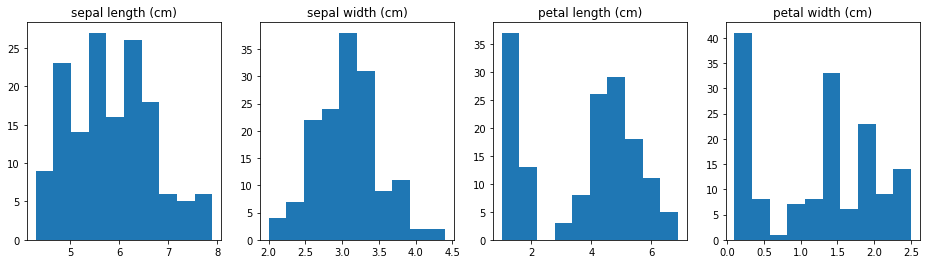

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))

for ii in np.arange (0, X.shape[1]):
    ax = axes[ii]
    ax.hist(X[:,ii])
    ax.set_title(Names[ii])

plt.show()

Doesn't seem like much clustering going on there; let's use smaller bins:

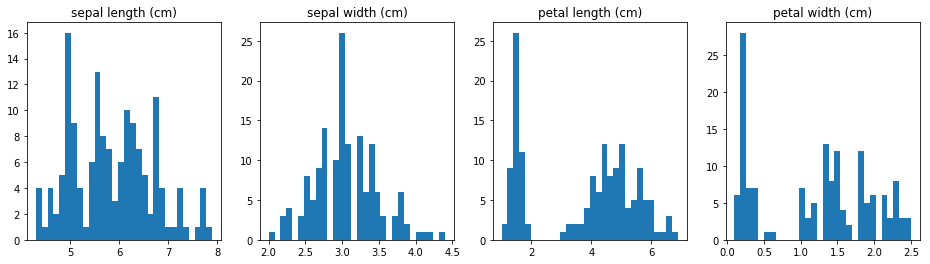

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))
for ii in np.arange (0, X.shape[1]):
    ax = axes[ii]
    ax.hist(X[:,ii], bins=30) ## We have 150 values for each feature; bins = 30 means we have 5 points per bin
    ax.set_title(Names[ii])

plt.show()

Much better!  Now we see more gaps between data distributions.  

As a side note, we could have used $bins = 50$, but that would only leave 3 points per bin - not enough for meaningful histograms.  The Freedman-Diaconis rule for computing the number of mins for a histogram is known to be very robust and work well in practice. The bin-width is set to $h=2∗IQR∗n^{(-1.3)} $. That makes the number of bins $(max-min)/h$.

We want a method to separate all data into normally-distributed groupings, fitting data points into K bell curves

In [6]:
#####################################
##  Let's see if we can apply the KMeans from scikit-learn to our data
km = KMeans (n_clusters=1, init='k-means++')
clstrs = km.fit (X)
print(clstrs.cluster_centers_.shape)
print(clstrs.cluster_centers_)


(1, 4)
[[ 5.84333333  3.054       3.75866667  1.19866667]]


This is a matrix, with coluns corresponding to each of the features and rows to each of the cluster centers.  Let's try a different number of centers:

In [7]:
km = KMeans (n_clusters=2, init='k-means++')
clstrs2 = km.fit (X)
print(clstrs2.cluster_centers_.shape)
print(clstrs2.cluster_centers_)

(2, 4)
[[ 6.30103093  2.88659794  4.95876289  1.69587629]
 [ 5.00566038  3.36037736  1.56226415  0.28867925]]


In [8]:
km = KMeans (n_clusters=5, init='k-means++')
clstrs5 = km.fit (X)
print(clstrs5.cluster_centers_.shape)
print(clstrs5.cluster_centers_)

(5, 4)
[[ 5.006       3.418       1.464       0.244     ]
 [ 6.52916667  3.05833333  5.50833333  2.1625    ]
 [ 7.475       3.125       6.3         2.05      ]
 [ 5.508       2.6         3.908       1.204     ]
 [ 6.20769231  2.85384615  4.74615385  1.56410256]]


Let's show the histograms of each of the features with the cluster centers at n_clusters = 3:


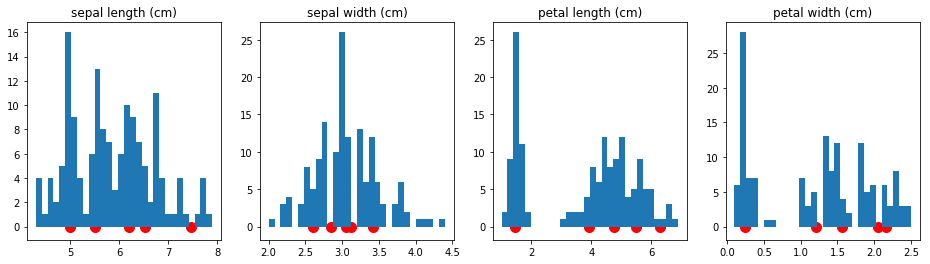

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))
for ii in np.arange (0, X.shape[1]):
    ax = axes[ii]
    ax.hist(X[:,ii], bins=30) ## We have 150 values for each feature; bins = 30 means we have 5 points per bin
    ax.scatter (x = clstrs5.cluster_centers_[:,ii], y = np.zeros(5), c = 'red', s = 100)
    ax.set_title(Names[ii])

plt.show()

Here the big red circles correspond to cluster centers.  We see that sepal length and petal length may be viewed as having 5 clusters (though most likely sepal length is really only 4), but sepal width is most likely one big cluster, and petal width really only has 4 clusters.

Let's wrap it into a function and check the histograms for several cluster counts

In [20]:
def ApplyKMeans (N, X = X, show_hist_and_centers = True):
    
    (print "Number of Clusters: %d", %N)
    km = KMeans (n_clusters=N, init='k-means++')
    clstrs = km.fit (X)
    
    fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))
    for ii in np.arange (0, X.shape[1]):
        ax = axes[ii]
        ax.hist(X[:,ii], bins=30) ## We have 150 values for each feature; bins = 30 means we have 5 points per bin
        ax.scatter (x = clstrs.cluster_centers_[:,ii], y = np.zeros(N), c = 'red', s = 100)
        ax.set_title(Names[ii])

    plt.show()

    print clstrs.cluster_centers_

    return clstrs

#for nn in [1,2,3,4,5,6,7,8,9,10]:
for nn in [1,2, 5]:
    clstrs = ApplyKMeans(nn)
    


SyntaxError: invalid syntax (<ipython-input-20-db8b4ccc2a39>, line 3)

We see that $ < 3$ clusters is too few, and $>= 5$ is too many. How can we decide what is the good number of clusters?

**One way to do that is to count the local maxima in the density plot.  A density plot is basically a continuous line conecting the peaks of the histogram bars.**

In python, plotting a density line is not as obvious as in R, but can be done.

More details here: http://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib
"gaussian_kde uses a changable function, covariance_factor to calculate it's bandwidth. Before changing the function, the value returned by covariance_factor for this data was about .5. Lowering this lowered the bandwidth. I had to call _compute_covariance after changing that function so that all of the factors would be calculated correctly. It isn't an exact correspondence with the bw parameter from R, but hopefully it helps you get in the right direction."

For more details on Gaussian KDE (kernel density estimator), see, e.g., here: https://en.wikipedia.org/wiki/Kernel_density_estimation and for its python implementation, here: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.gaussian_kde.html

In [10]:
from scipy.stats import gaussian_kde
def DrawDensityPlot(myVector, Name, ax, covar_factor = 0.1):
    data = myVector
    density = gaussian_kde(data)
    minData = min(data)
    maxData = max (data)
    sizeOfData = len(data)
    xs = np.linspace(minData,maxData,sizeOfData)
    density.covariance_factor = lambda : covar_factor
    density._compute_covariance()
    ax.plot(xs,density(xs))
    ax.set_title(Name)
    return ax

In [14]:
##  Use the ShowDensityPlot function:

def ApplyKMeansShowDensity (N, X = X, show_hist_and_centers = True, kde_covar_factor = 0.1):
    
    print("---------------------------------")
    print("Number of Clusters: %d" %, (N))
    km = KMeans (n_clusters=N, init='k-means++')
    clstrs = km.fit (X)
    
    fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))
    for ii in np.arange (0, X.shape[1]):
        ax = axes[ii]
        ax = DrawDensityPlot(myVector = X[:,ii], Name = Names[ii], ax = ax, covar_factor = kde_covar_factor)
        ax.scatter (x = clstrs.cluster_centers_[:,ii], y = np.zeros(N), c = 'red', s = 100)

    plt.show()

    print clstrs.cluster_centers_

    return clstrs

#for nn in [1,2,3,4,5,6,7,8,9,10]:
for nn in [2,3,4,5]:  ##  Single cluster is an exercise in futility, and we already know that >=5 clusters is already too many
    clstrs = ApplyKMeansShowDensity(nn, kde_covar_factor =0.1125)
    

SyntaxError: invalid syntax (<ipython-input-14-fb6914da4791>, line 6)

In other words, if we have a way to get the number of local maxima of the PDF (probability density function), then we have a way to tell KMeans how many clusters to look for in the data.

If we already know the local PDF maxima, why use KMeans at all?  We can slide down the peaks of the PDFs until we reach the corresponding local minima (**"cluster expansion process"**).  This is known as the **DBSCAN** method.  It is very powerful; guesswork is eliminated; it does not need to know how many clusters you are looking for.  Its only downside is its low computational efficiency compared with KMeans and hierarchical clustering.

You can find its description here:  https://en.wikipedia.org/wiki/DBSCAN.  Its python implementation is here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html and here: http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

Back to our data.  If we look at finding the optimal number of clusters as a likelihood-maximization probem, we can use **Information Criteria (*BIC* and *AIC*)** to estimate when we can stop increasing the number: if we are not adding new information by adding one more cluster, we are done.  This method is also known as ***X-means***. The paper introducing it is here:  http://www.cs.cmu.edu/~dpelleg/download/xmeans.pdf


I coplied this function from http://stats.stackexchange.com/questions/90769/using-bic-to-estimate-the-number-of-k-in-kmeans.  It merely imements the BIC computation

In [15]:
from scipy.spatial import distance
def compute_bic(kmeans,X):
    '''
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering objects from scikit-learn
    X     :  multidimensional np array of data points

    Returns:
    -----------------------------------------
    BIC value
    '''
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = [(1.0 / (n[i] - m)) * sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 'euclidean')**2)  for i in xrange(m)]

    const_term = 0.5 * m * np.log10(N)

    BIC = np.sum([n[i] * np.log10(n[i]) -
           n[i] * np.log10(N) -
         ((n[i] * d) / 2) * np.log10(2*np.pi) -
          (n[i] / 2) * np.log10(cl_var[i]) -
         ((n[i] - m) / 2) for i in xrange(m)]) - const_term

    return BIC

for ff in np.arange (X.shape[1]):

    myX = X[:,ff].reshape (len (X[:,ff]), 1)
    print("Feature: %s" % (Names[ff]))
    # print myX.shape
    
    for nn in [1,2,3,4,5]:
        km = KMeans (n_clusters=nn, init='k-means++')
        clstrs = km.fit (myX)
        bic = compute_bic(clstrs, myX)
        print("Feature: %s. Number of clusters = %d.  BIC = %.3f" % (Names[ff], nn, bic))



Feature: sepal length (cm)


NameError: name 'xrange' is not defined

We see that for different features, our BIC peaks at different cluster numbers:

    Sepal Length:  5
    Sepal Width:   1
    Petal Length:  5
    Petal Width:   3 or 5
    
Reproduce the histograms here again:

Number of Clusters: 1


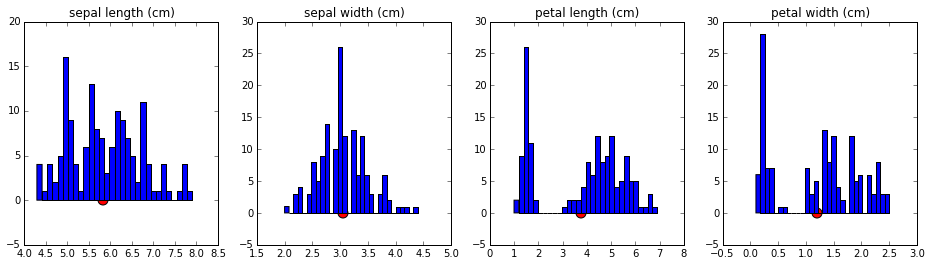

[[ 5.84333333  3.054       3.75866667  1.19866667]]
Number of Clusters: 2


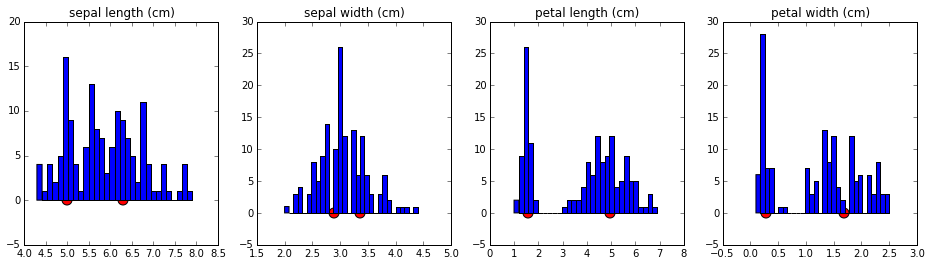

[[ 5.00566038  3.36037736  1.56226415  0.28867925]
 [ 6.30103093  2.88659794  4.95876289  1.69587629]]
Number of Clusters: 3


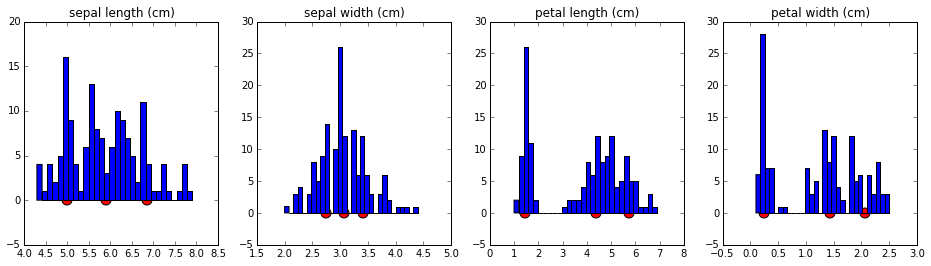

[[ 5.006       3.418       1.464       0.244     ]
 [ 6.85        3.07368421  5.74210526  2.07105263]
 [ 5.9016129   2.7483871   4.39354839  1.43387097]]
Number of Clusters: 4


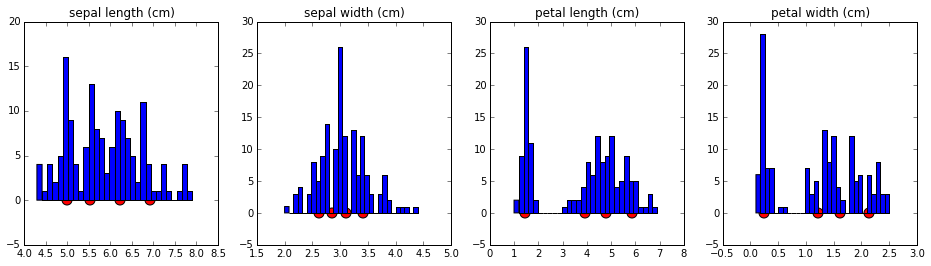

[[ 6.9125      3.1         5.846875    2.13125   ]
 [ 5.006       3.418       1.464       0.244     ]
 [ 5.52962963  2.62222222  3.94074074  1.21851852]
 [ 6.23658537  2.85853659  4.80731707  1.62195122]]
Number of Clusters: 5


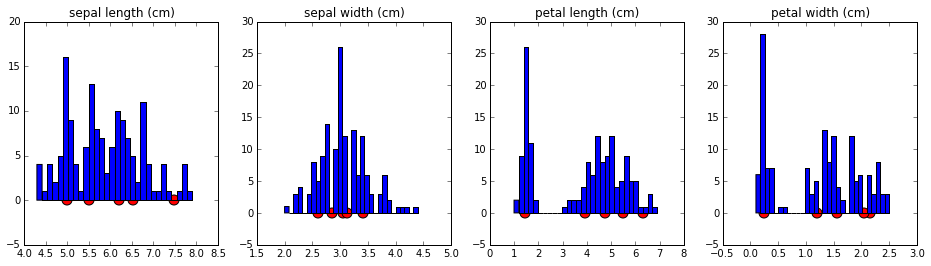

[[ 6.20769231  2.85384615  4.74615385  1.56410256]
 [ 5.006       3.418       1.464       0.244     ]
 [ 6.52916667  3.05833333  5.50833333  2.1625    ]
 [ 5.508       2.6         3.908       1.204     ]
 [ 7.475       3.125       6.3         2.05      ]]


In [13]:
for nn in [1,2,3,4,5]:
    clstrs = ApplyKMeans(nn)
    

While the placement of cluster centers may not meet our expectations in the case of petal width, the other results from the BIC decision support make sence: 


    Sepal Length:  5
    Sepal Width:   1
    Petal Length:  5
    Petal Width:   3 or 5
    

# Conclusions:

We have discussed the K-Means clustering method applied to one-dimensional data.  It is a very efficient, fast, and powerful method.

We discussed some ways to improve clustering reproducibility and to figure out the optimal cluster count.

We also mentioned the DBSCAN method and outlined in general how it works.

Next step - multidimensional clusters.